In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


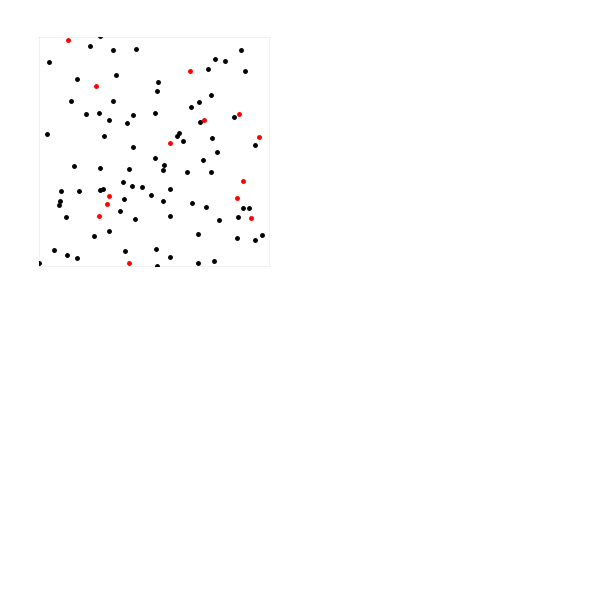

<IPython.core.display.Javascript object>


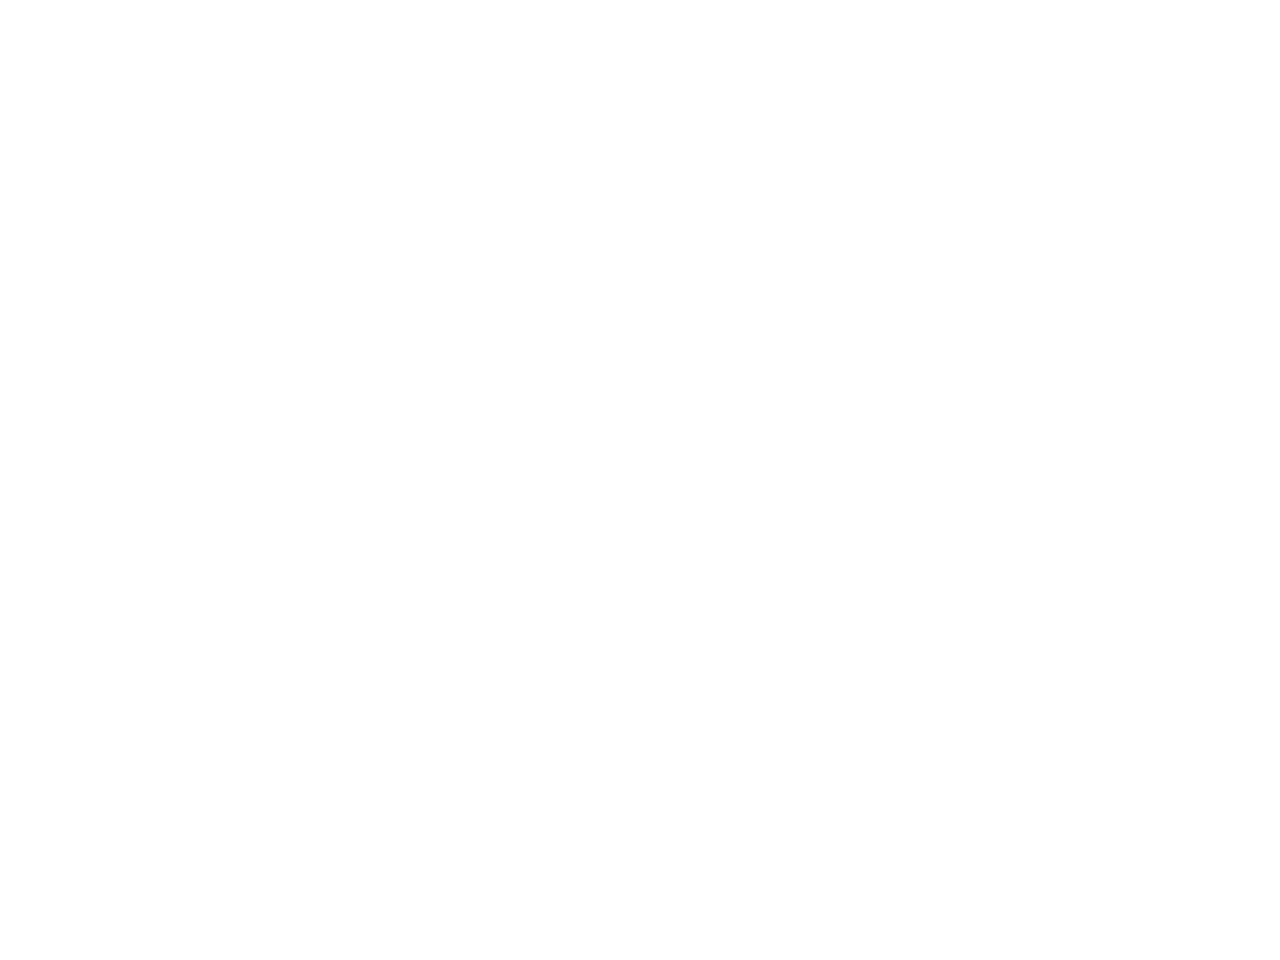

Text(0, 0.5, 'Estimate of the number of turtles')

In [3]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps):
    # Moving elks around
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
    vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
    
    # Recapture
    n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
    n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
    estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
    
    ax.clear()
    plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
    plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')

<IPython.core.display.Javascript object>


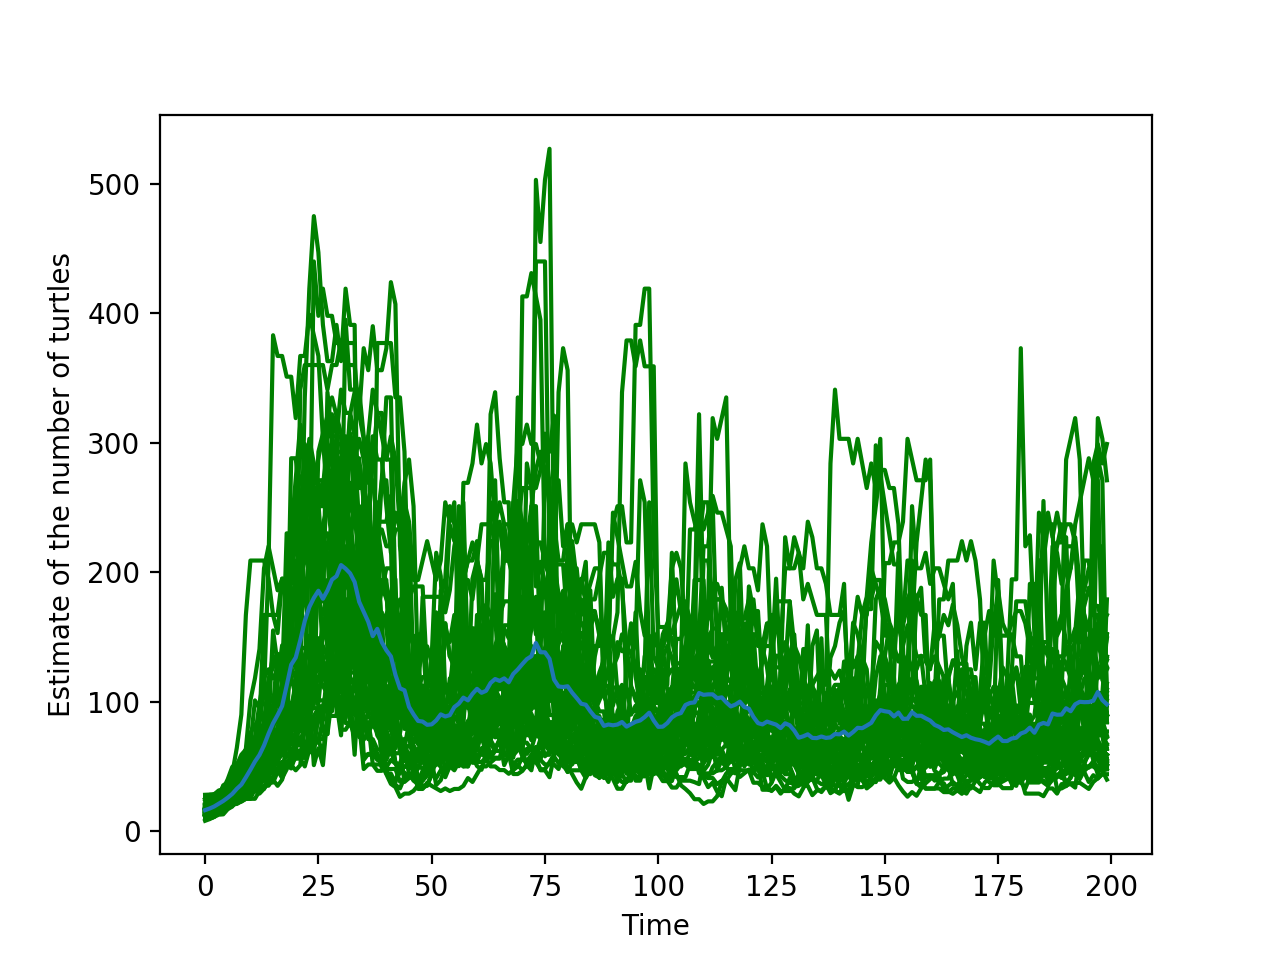

In [12]:
%matplotlib notebook

n_animals = 100
n_steps = 200
n_trials = 50
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
flag_dot_plot = False

history = np.zeros((n_steps, n_trials))

for i_trials in range(n_trials):
    x = np.random.uniform(size=n_animals)
    y = np.random.uniform(size=n_animals)
    vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
    vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

    # Capture
    color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
    n_marked = np.sum(color)

    estimation = np.zeros(n_steps) # At every point in time
                                    # .. we'll remember the estimation for N an ecologist could have made 

    
    if flag_dot_plot:
        # Plotting
        fig = plt.figure(figsize=(3,3))
        ax = plt.subplot(111)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.show()
        fig.canvas.draw()

    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
        
        if flag_dot_plot:
            ax.clear()
            plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
            plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.canvas.draw() # <--------------- The main command to make it move
            #time.sleep(0.5)
    
    history[:, i_trials] = estimation
    
    
    plt.plot(estimation, 'g-')
    plt.xlabel('Time')
    plt.ylabel('Estimate of the number of turtles')
    
plt.plot(np.mean(history,axis = 1))

<IPython.core.display.Javascript object>


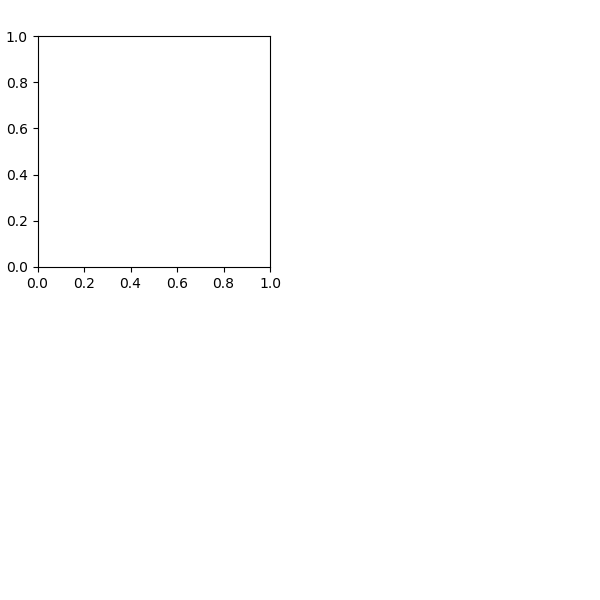

ValueError: operands could not be broadcast together with shapes (2,) (2,100) 

In [12]:
%matplotlib notebook

n_animals = 100
n_steps = 2
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
#trap_size2 = np.random.uniform(size=n_steps, low =(trap_size/4)+trap_size, high=(trap_size/4)-trap_size)

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

#2nd model
color2 = np.where(np.logical_and(x<(trap_size/4)+trap_size , y<(trap_size/4)-trap_size), 2, 0) # All captured are color1, all free ones are color0
n_marked2 = np.sum(color2)

estimation = np.zeros(shape=(n_steps, n_animals)) # At every point in time the estimation for N an ecologist
                            
#history of estimate
hist_estimate = np.zeros(n_steps)
hist_estimate2 = np.zeros(n_steps) #second hist

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()


for t in range(n_steps): #loop through 
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
        
        n_recaptured_total2 = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked2 = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked2+1)/(n_recaptured_marked2+1)*(n_recaptured_total2)-1 # Chapman estimator
        
        #est_hist
        hist_estimate = (hist_estimate+estimation)/n_steps #border
        hist_estimate2 = (hist_estimate2+estimation2)/n_steps #center
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    


plt.figure()
plt.plot(hist_estimate)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of animals')
plt.title('Average Estimate vs Time: Border Trapped');


plt.figure()
plt.plot(hist_estimate2)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of animals')
plt.title('Average Estimate vs Time: Center Trapped');


Originally, I predicted that it would be better to capture the animals from the middle of the field, since there would be more foot traffic from the animals. I had diffuclty modeling the projection for trapping in the middle of the graph. I recieved lots of error for the equations that I tried to input and so now my next goal is to determine where my error occured. I had orginsllly succeded in simply creating a graph of the histories.

<IPython.core.display.Javascript object>


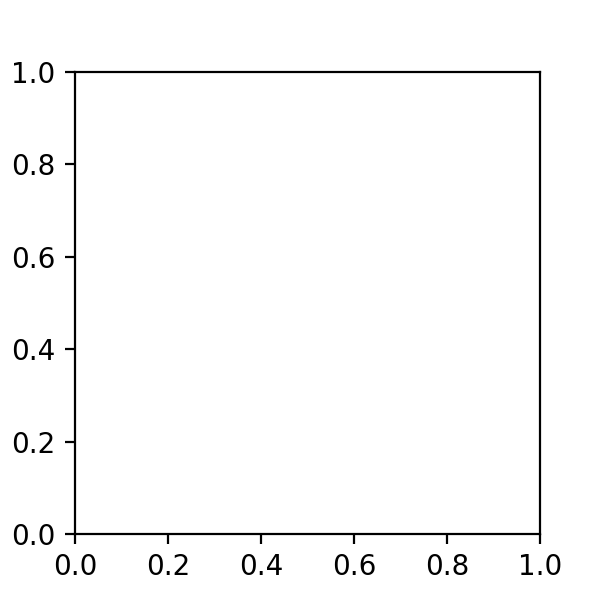

NameError: name 'hist_estimate' is not defined

In [32]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps): #loop through 
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

        hist_estimate = (hist_estimate+estimation)/n_steps #border
        
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')
plt.title('Average Estimate vs Time: Center Trapped');

<IPython.core.display.Javascript object>


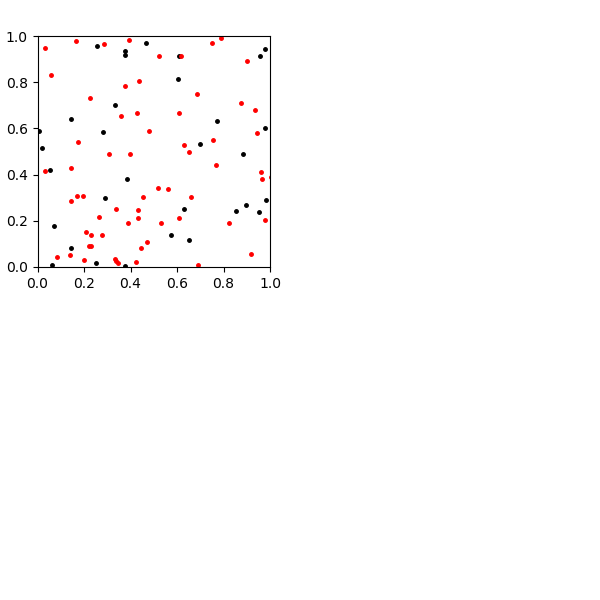

IndexError: index 2 is out of bounds for axis 0 with size 2

In [14]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.8 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for i in range(n_steps): #loop through 
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

        hist_estimate[i] = (hist_estimate[i]+estimation[i])/n_steps #border
        
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')
plt.title('Average Estimate vs Time: Border Trapped');

# WORKING VERSION

<IPython.core.display.Javascript object>


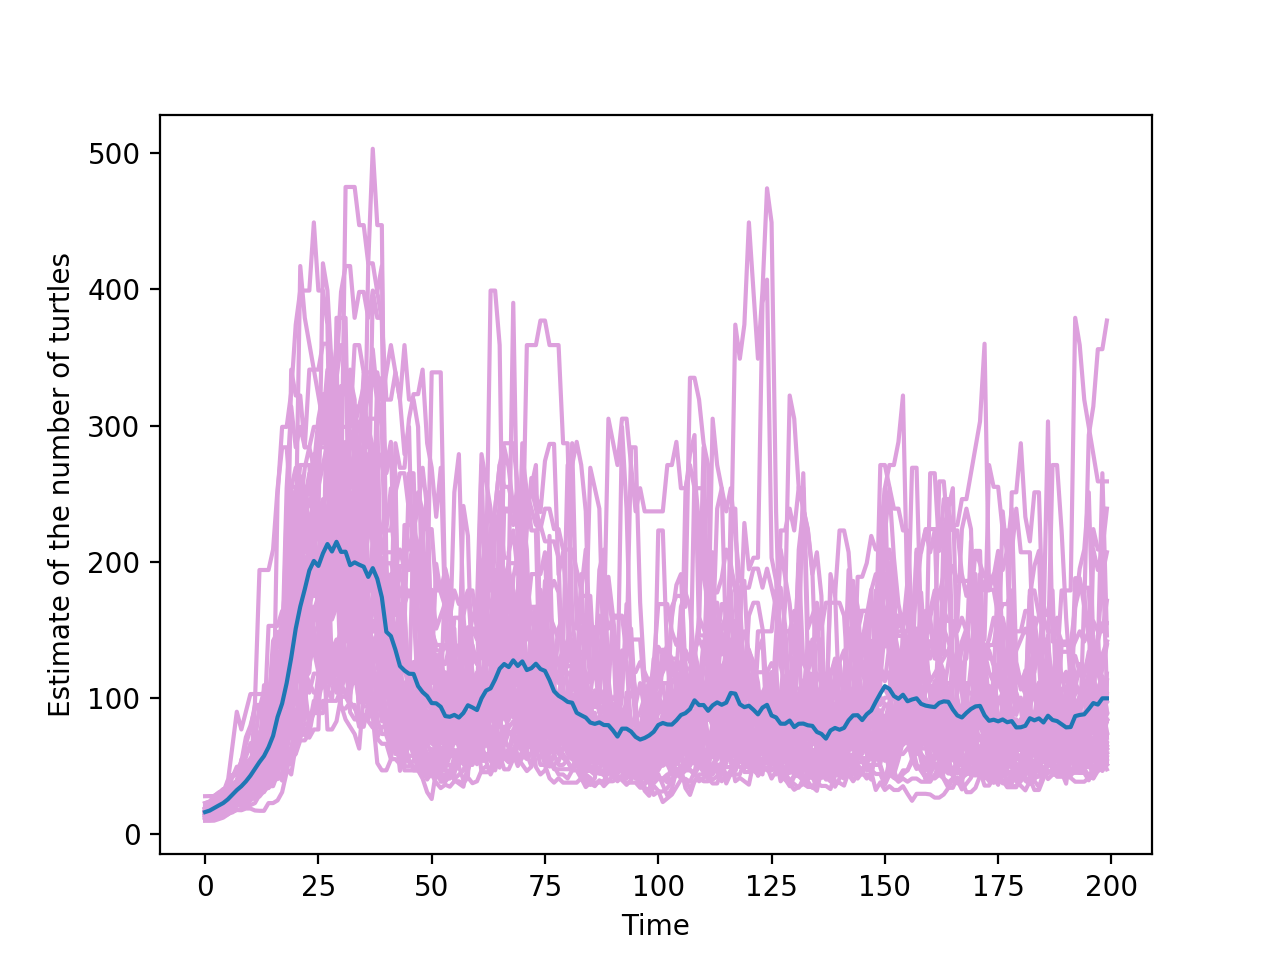

In [15]:
%matplotlib notebook

n_animals = 100
n_steps = 200
n_trials = 50
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
flag_dot_plot = False

history = np.zeros((n_steps, n_trials))

for i_trials in range(n_trials):
    x = np.random.uniform(size=n_animals)
    y = np.random.uniform(size=n_animals)
    vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
    vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

    # Capture
    color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
    n_marked = np.sum(color)

    estimation = np.zeros(n_steps) # At every point in time
                                    # .. we'll remember the estimation for N an ecologist could have made 

    
    if flag_dot_plot:
        # Plotting
        fig = plt.figure(figsize=(3,3))
        ax = plt.subplot(111)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.show()
        fig.canvas.draw()

    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
        
        if flag_dot_plot:
            ax.clear()
            plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
            plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.canvas.draw() # <--------------- The main command to make it move
            #time.sleep(0.5)
    
    history[:, i_trials] = estimation
    
    
    plt.plot(estimation, '-', color = 'plum')
    plt.xlabel('Time')
    plt.ylabel('Estimate of the number of turtles')
    
plt.plot(np.mean(history,axis = 1))

## Experiments

In [17]:
class Const: #creates a class
    def __init__(self): #defines it as itself? and in the class are the attributes
        self.n_animals = 100
        self.n_steps = 200
        self.n_trials = 50
        self.vmin = 0.01
        self.vmax = 0.05
        self.trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
        self.flag_dot_plot = False
#to call the class variables
c.vmin
c.vmax

0.01

In [25]:
def model(c): #defines model with input c
    history = np.zeros((c.n_steps, c.n_trials))  #variable for history 

    for i_trial in range(c.n_trials):
        x = np.random.uniform(size=c.n_animals)
        y = np.random.uniform(size=c.n_animals)
        vx = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)

        # Capture
        color = np.where(np.logical_and(x<c.trap_size , y<c.trap_size), 1, 0) # All captured are color1, all free ones are color0
        n_marked = np.sum(color)

        estimation = np.zeros(c.n_steps)  # Main output variable. At every point in time
                                        # .. we'll remember the estimation for N an ecologist could have made 

        if c.flag_dot_plot: # Plotting
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            # Moving elks around
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            # Recapture
            n_recaptured_total = np.sum(np.logical_and(x<c.trap_size, y<c.trap_size))
            n_recaptured_marked = np.sum(np.logical_and(x<c.trap_size, y<c.trap_size)*color) # Condition1 AND cond2 AND color==1
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

            if c.flag_dot_plot: # Actual animation
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # <--------------- The main command to make it move

        history[:,i_trial] = estimation
    return history

       

Main plotting method

<IPython.core.display.Javascript object>


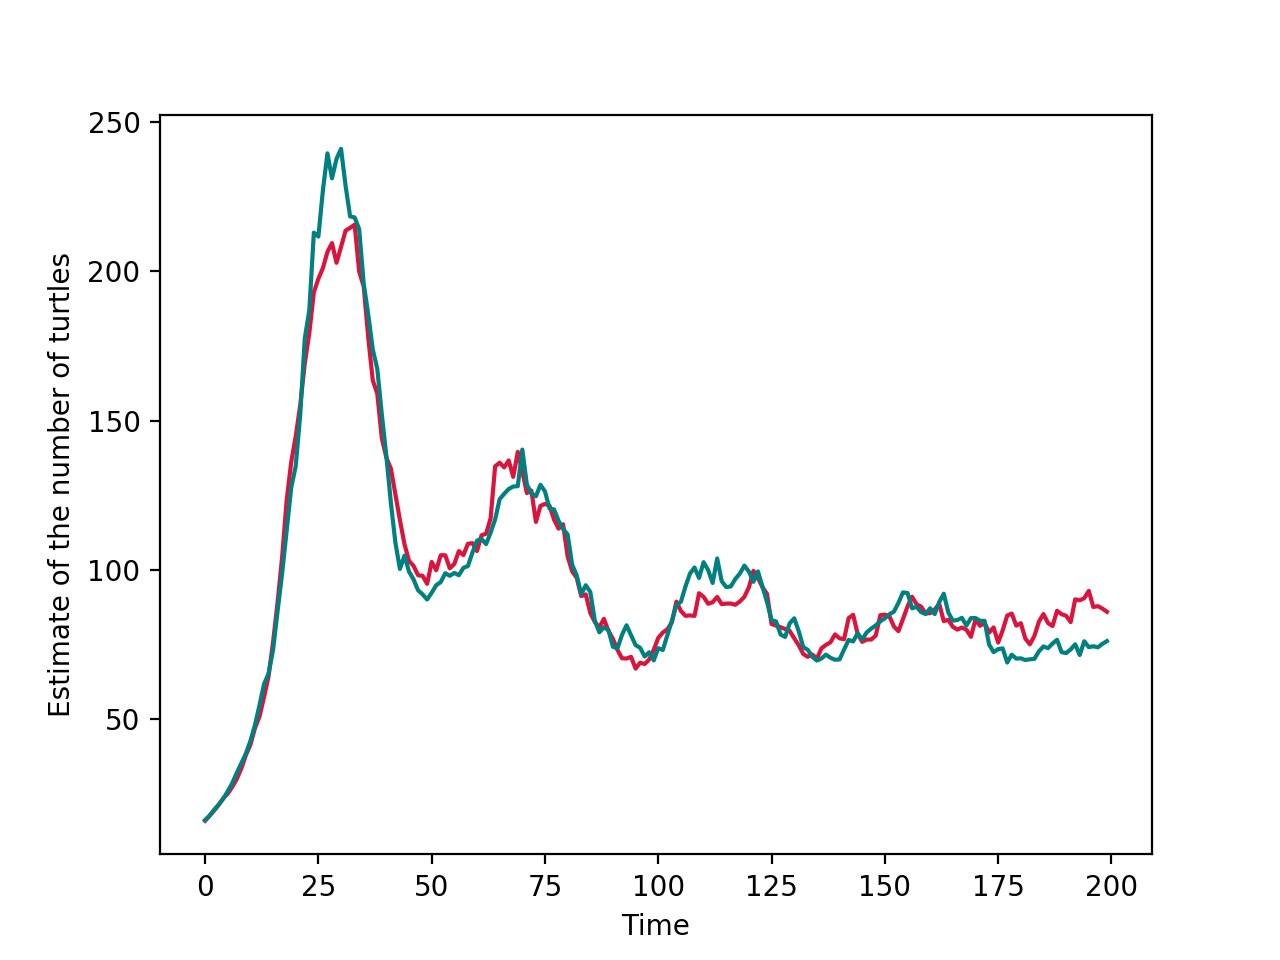

Text(0, 0.5, 'Estimate of the number of turtles')

In [36]:
c = Const()
#c.flag_dot_plot = True # makes it run forever
curve = np.mean(model(c), axis = 1)
c.trapsize = .3
curve2 = np.mean(model(c), axis = 1)

plt.figure()
plt.plot(curve,'-', color = 'crimson')
plt.plot(curve2,'-', color = 'teal')
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')


## DIFFERENT WAYS OF USING CLASSES

In [37]:
class Const: #creates a class
    def __init__(self): #defines it as itself? and in the class are the attributes
        self.n_animals = 100
        self.n_steps = 200
        self.n_trials = 50
        self.vmin = 0.01
        self.vmax = 0.05
        self.trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
        self.trap_loc = 'corner'
#to call the class variables
a.vmin
a.vmax

0.05

In [45]:
def model(a, show_dots = False, n_trials =1): #defines model with input c
    history = np.zeros((a.n_steps, a.n_trials))  #variable for history 

    for i_trial in range(a.n_trials):
        x = np.random.uniform(size=a.n_animals)
        y = np.random.uniform(size=a.n_animals)
        vx = np.random.uniform(size=a.n_animals, low=c.vmin, high=a.vmax)*(
            2*np.random.randint(size=a.n_animals,low=0,high=2) - 1)
        vy = np.random.uniform(size=a.n_animals, low=c.vmin, high=a.vmax)*(
            2*np.random.randint(size=a.n_animals,low=0,high=2) - 1)

        is_dead = np.random.uniform(size = a.n_animals) < a.death_rate
        color[is_replaced]
        
        # Capture
        if a.trap_loc == 'corner':
            color = np.where(np.logical_and(x<a.trap_size , y<a.trap_size), 1, 0) # All captured are color1, all free ones are color0
        else:
            color = np.where(np.logical_and((x < .5 + a_trap_size/2)*(x >.5 - a_trap_size/2)*(
                y < .5 + a_trap_size/2)*(y >.5 - a_trap_size/2),1, 0) # All captured are color1, all free ones are color0
             
        
        n_marked = np.sum(color)

        estimation = np.zeros(a.n_steps)  # Main output variable. At every point in time
                                        # .. we'll remember the estimation for N an ecologist could have made 

        if show_dots: # Plotting
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(a.n_steps):
            # Moving elks around
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            # Recapture
            if a.trap_loc == 'corner':
                is_inside = np.logical_and(x< a.trap_size, y < trap_size)
            else:
                is_inside = (x < .5 + a_trap_size/2)*(x >.5 - a_trap_size/2)*(
                y < .5 + a_trap_size/2)*(y >.5 - a_trap_size/2)
                             
                n_recaptured_total = np.sum(is_inside)
                n_recaptured_marked = np.sum(is_inside*color) # Condition1 AND cond2 AND color==1
                estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

            if show_dots: # Actual animation
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # <--------------- The main command to make it move

        history[:,i_trial] = estimation
    return np.mean(history, axis = 1)


In [48]:
a = Const()
#c.flag_dot_plot = True # makes it run forever
curve = model(a, n_trials = 10)
a.trapsize = 0.3
curve2 = model(a, n_trials= 10)
a.trap_loc = 'corner'
plt.figure()
plt.plot(curve,'-', color = 'crimson', label = 'corner trap' )
plt.plot(curve2,'-', color = 'teal', label = 'center trap')
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')

AttributeError: 'Const' object has no attribute 'trap_loc'